<a href="https://colab.research.google.com/github/Ivelina0/Computational_Finance/blob/main/Lectures_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Created on Thu Nov 27 2018
Paths for the GBM and ABM
@author: Lech A. Grzelak

My interpretation of the code.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture 3

Monte Carlo Paths - The Hedging Example

In [ ]:
## Generate random Paths - create matrix that holds the paths NOT simulated path by path as it needs double for loop but performs time slicing 
## e.g. no. of rows = no. of paths
## & no. of columns = no. of time steps

def GeneratePathsGBMABM(NoOfPaths, NoOfSteps, T, r, sigma, S_0): 

  '''
  Variables
  NoOfPaths: number of random walks
  NoOfSteps: number of time steps - determines the delta t size of discretesation i.e. in how many pieces will the time from 0 until T be divided
  T: time until we want to simulate our path 
  r: interest rate (mu)
  sigma: volatility 
  S_0: initial value for the process
  '''   
  # Fixing random seed
  np.random.seed(1)
        
  Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps]) # noisrs
  X = np.zeros([NoOfPaths, NoOfSteps+1])
  S = np.zeros([NoOfPaths, NoOfSteps+1])
  time = np.zeros([NoOfSteps+1])
        
  X[:,0] = np.log(S_0)
    
  dt = T / float(NoOfSteps) # maturity divided by number of steps

  for i in range(0,NoOfSteps):
    # making sure that samples from normal have mean 0 and variance 1
    if NoOfPaths > 1:
      Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i]) # standardise the samples we have generated to have mean 0 & var 1
      ## helps to acheive better convergence
            
      X[:,i+1] = X[:,i] + (r - 0.5 * sigma **2 ) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
      time[i+1] = time[i] +dt
        
    #Compute exponent of ABM
  S = np.exp(X)
  paths = {"time":time,"X":X,"S":S}
  return paths


## Set up some parameters
## Call function which is responsible for generating Random paths
def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100
    
    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]

    fig = plt.figure(figsize=(12,10))
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    fig = plt.figure(figsize=(12,10))
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")

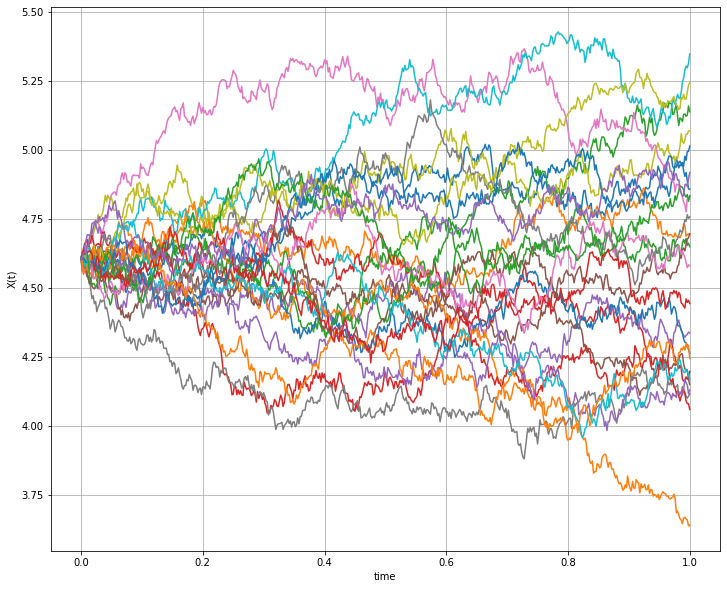

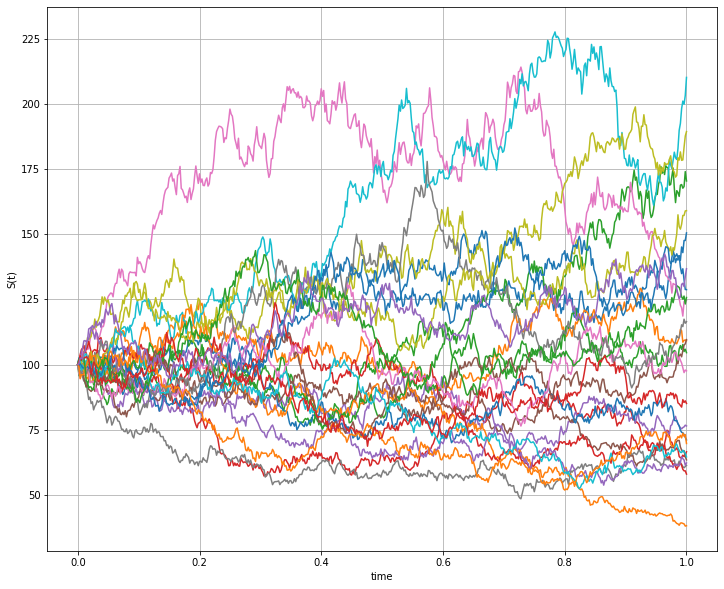

In [ ]:
mainCalculation()

Monte Carlo Paths - the Martingale approach example 

In [ ]:
## Checking if the Stockastic process is a martingale

## Set up some parameters
## Call function which is responsible for generating Random paths
def mainCalculation():
  NoOfPaths = 5000
  NoOfSteps = 500
  T = 1
  r = 0.05
  sigma = 0.4
  S_0 = 100
    
  M = lambda r,t: np.exp(r*t)
    
  Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
  timeGrid = Paths["time"]
  X = Paths["X"]
  S = Paths["S"]

  # checking martingale property
  ES = np.mean(S[:,-1])  ## expectation of S (stock process). Is a stock process a martingale? (no)
  print('E(S)',ES)
  
  # discounted stock value - the future stock value/ money savings account at the maturity 
  ESM = np.mean(S[:,-1]/M(r,T))
  print('E[S/M]',ESM)  ## much closer to today's value of the stock i.e. S_0

  ## the E[S/M] will get closer to today's value S_0 as the number of paths increases (NoOfPaths increases)
  ## Can try to do things to get a better convergence - see later in course.
    
mainCalculation()

E(S) 105.14683124777936
E[S/M] 100.01875977589884


Simulate Monte Carlo paths using either Q or P - measures 

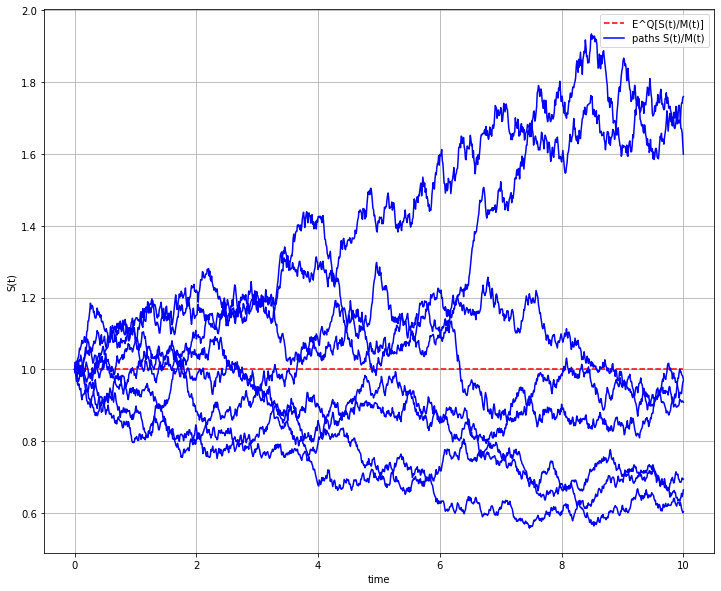

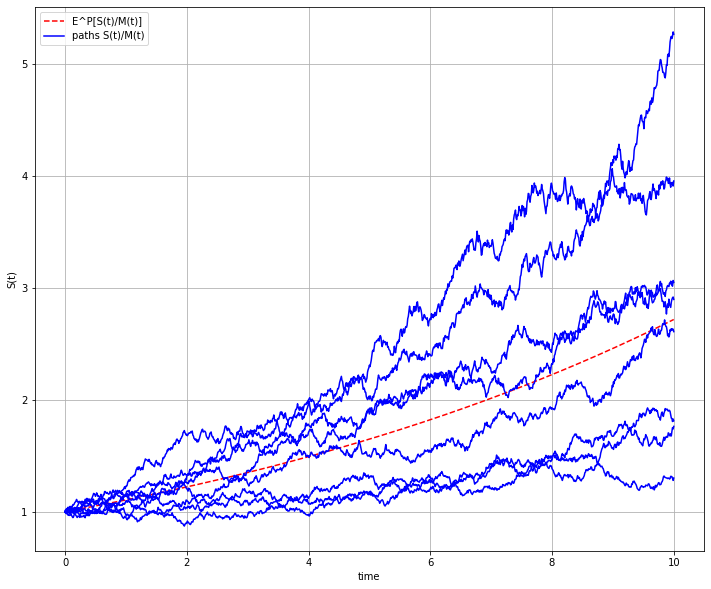

In [ ]:
## Generate Geometric Brownian Motion GBM

def GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
     
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma *\
        np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
    #Compute exponent of ABM
    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths

def MainCode():
  NoOfPaths = 8
  NoOfSteps = 1000 ## np. of time steps in discretisation
  S_0       = 1
  ## two rates: r and sigma
  r         = 0.05 ## risk neutral rate == corresponds to the money savings account
  mu        = 0.15 ## estimated from historical data or future option behaviour
  sigma     = 0.1
  T         = 10
  
  # Money savings account
  M         = lambda t: np.exp(r * t)
    
  ### Monte Carlo Paths
  # drift with mu
  pathsQ    = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
  S_Q       = pathsQ["S"]
  # drift with sigma
  pathsP = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
  S_P = pathsP["S"]

  time= pathsQ["time"]    
    
  ### Discounted Stock paths
  S_Qdisc = np.zeros([NoOfPaths,NoOfSteps+1])
  S_Pdisc = np.zeros([NoOfPaths,NoOfSteps+1])
  i = 0
  for i, ti in enumerate(time):
    S_Qdisc[:, i] = S_Q[:,i]/M(ti) ## under Qmeasure S/M is a martingale so it is constant over time 
    S_Pdisc[:, i] = S_P[:,i]/M(ti) ##
    
    # S(T)/M(T) with Stock growing with rate r
  fig = plt.figure(figsize=(12,10))
  plt.figure(1)
  plt.grid()
  plt.xlabel("time")
  plt.ylabel("S(t)")
  eSM_Q = lambda t: S_0 * np.exp(r *t) / M(t)
  plt.plot(time,eSM_Q(time),'r--')
  plt.plot(time, np.transpose(S_Qdisc),'blue')   
  plt.legend(['E^Q[S(t)/M(t)]','paths S(t)/M(t)'])
    
    # S(T)/M(T) with Stock growing with rate mu
  fig = plt.figure(figsize=(12,10))
  plt.figure(2)
  plt.grid()
  plt.xlabel("time")
  plt.ylabel("S(t)")
  eSM_P = lambda t: S_0 * np.exp(mu *t) / M(t)
  plt.plot(time,eSM_P(time),'r--')
  plt.plot(time, np.transpose(S_Pdisc),'blue')   
  plt.legend(['E^P[S(t)/M(t)]','paths S(t)/M(t)'])
    
MainCode()

# Lecture 4

In [ ]:
import numpy as np
import scipy.stats as st
# Initial parameters and market quotes
V_market = 2    # market call option price
K        = 120  # strike
tau      = 1    # time-to-maturity
r        = 0.05 # interest rate
S_0      = 100  # today's stock price
sigmaInit    = 0.25  # Initial implied volatility: needs to be sufficiently close to the real value
CP       ="c" #C is call and P is put


## Main 'idea' of code

def ImpliedVolatility(CP,S_0,K,sigma,tau,r):
    error    = 1e10; # initial error: should set a large parameter since if it is too small it will stop after a few iterations

    #Handy lambda expressions
    optPrice = lambda sigma: BS_Call_Option_Price(CP,S_0,K,sigma,tau,r)
    vega= lambda sigma: dV_dsigma(S_0,K,sigma,tau,r)
    
    # While the difference between the model and the arket price is large
    # follow the iteration
    n = 1.0 
    while error>10e-10:
        g         = optPrice(sigma) - V_market ## 
        g_prim    = vega(sigma)
        sigma_new = sigma - g / g_prim
    
        #error=abs(sigma_new-sigma)
        error=abs(g)
        sigma=sigma_new;
        
        print('iteration {0} with error = {1}'.format(n,error))
        
        # running index - if it gets too large then we can stop with an error message e.g. ' algorithm did not converge'
        n= n+1
    return sigma

# Vega parameter/coefficient, dV/dsigma  -- does not depend on a call or put option
def dV_dsigma(S_0,K,sigma,tau,r):
    #parameters and value of Vega
    d2   = (np.log(S_0 / float(K)) + (r - 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    value = K * np.exp(-r * tau) * st.norm.pdf(d2) * np.sqrt(tau)
    return value

def BS_Call_Option_Price(CP,S_0,K,sigma,tau,r):
    #Black-Scholes Call option price
    d1    = (np.log(S_0 / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)

    ## Call or Put Option
    if str(CP).lower()=="c" or str(CP).lower()=="1":
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    elif str(CP).lower()=="p" or str(CP).lower()=="-1":
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S_0
    return value

sigma_imp = ImpliedVolatility(CP,S_0,K,sigmaInit,tau,r)
message = '''Implied volatility for CallPrice= {}, strike K={}, 
      maturity T= {}, interest rate r= {} and initial stock S_0={} 
      equals to sigma_imp = {:.7f}'''.format(V_market,K,tau,r,S_0,sigma_imp)
            
print(message)

# Check! Compute price with implied volatility we found
val = BS_Call_Option_Price(CP,S_0,K,sigma_imp,tau,r)
print('Option Price for implied volatility of {0} is equal to {1}'.format(sigma_imp, val))

iteration 1.0 with error = 3.025413481792615
iteration 2.0 with error = 0.19134998568795325
iteration 3.0 with error = 0.0022254541477302325
iteration 4.0 with error = 3.353154056640051e-07
iteration 5.0 with error = 1.0658141036401503e-14
Implied volatility for CallPrice= 2, strike K=120, 
      maturity T= 1, interest rate r= 0.05 and initial stock S_0=100 
      equals to sigma_imp = 0.1614827
Option Price for implied volatility of 0.1614827288413938 is equal to 2.0
